In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

D:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

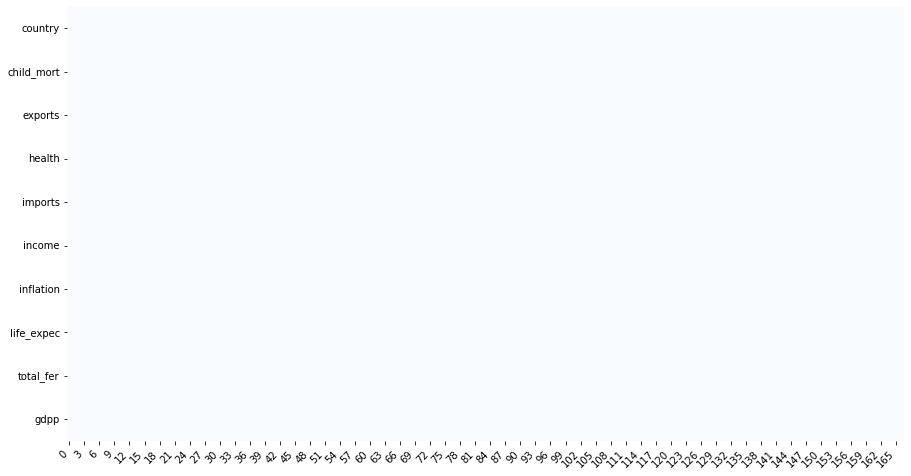

In [4]:
plot_missing_value(df)

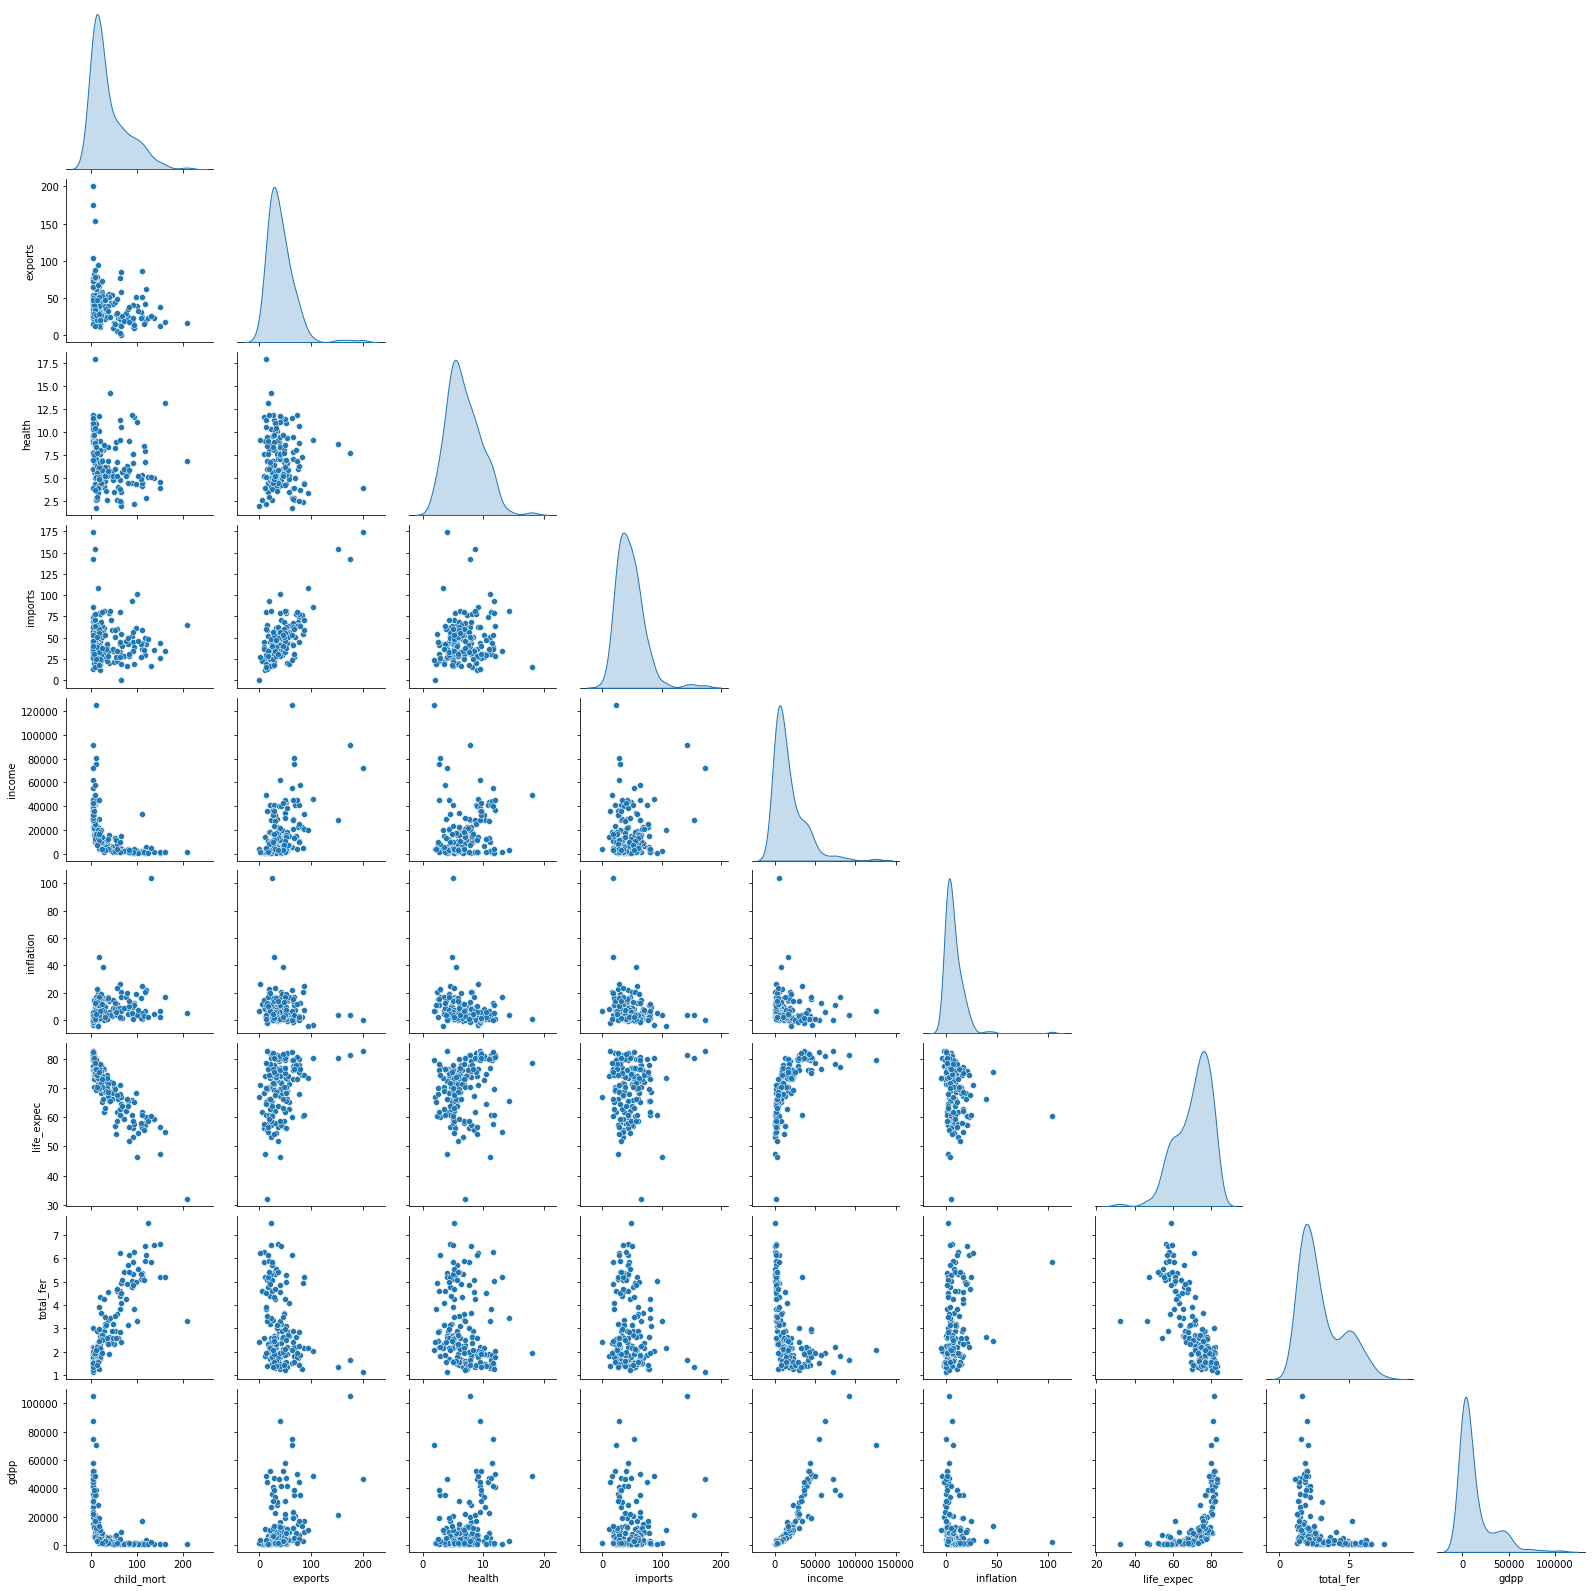

In [5]:
sns.pairplot(data = df, corner=True, diag_kind="kde", )


In [6]:
df.drop(columns="country", inplace=True)

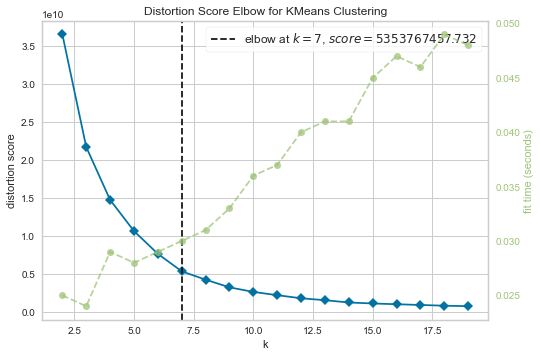

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Finding optimal cluster number by using Elbow method.
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show()

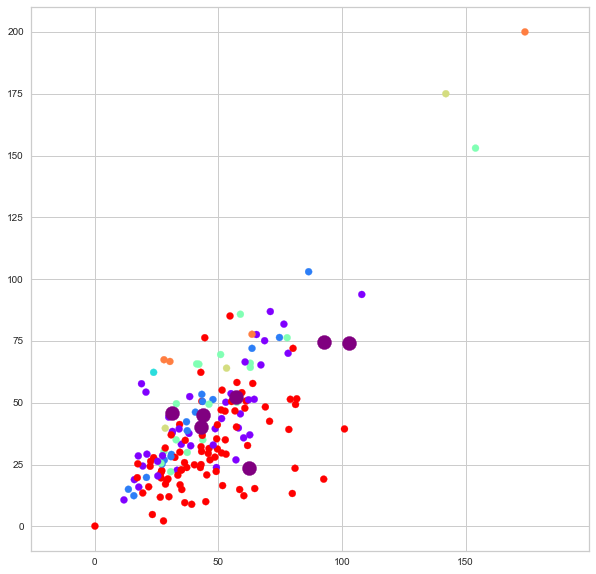

In [35]:
model = KMeans(n_clusters=7, random_state=42)
member = model.fit_predict(df)
center = model.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(df['imports'], df['exports'], c=member, cmap='rainbow')
plt.scatter(center[:, 1], center[:, 3], c="purple", s=200)
plt.axis("equal")
plt.show()


# center

In [ ]:
member

array([5, 5, 0, 5, 0, 0, 5, 2, 2, 0, 6, 6, 5, 0, 0, 2, 5, 5, 5, 5, 5, 0,
       0, 1, 0, 5, 5, 5, 5, 2, 5, 5, 5, 0, 5, 0, 5, 5, 5, 0, 5, 0, 6, 6,
       2, 0, 5, 5, 5, 6, 5, 0, 5, 2, 2, 0, 5, 5, 2, 5, 6, 0, 5, 5, 5, 5,
       5, 0, 2, 5, 5, 0, 0, 2, 6, 2, 5, 2, 5, 0, 5, 5, 1, 5, 5, 0, 0, 5,
       5, 6, 0, 4, 0, 5, 5, 0, 0, 5, 6, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       2, 6, 5, 5, 4, 6, 5, 0, 5, 5, 5, 0, 6, 3, 0, 0, 5, 5, 6, 5, 0, 0,
       5, 1, 6, 6, 5, 0, 6, 6, 5, 0, 5, 0, 2, 4, 5, 5, 0, 5, 5, 5, 5, 0,
       5, 5, 5, 1, 2, 2, 0, 5, 5, 0, 5, 5, 5])

In [ ]:
dfPred = df.copy()
dfPred["cluster"] = member


In [ ]:
dfPred.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,5
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,5
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
clustering = dfPred.groupby('cluster')
clustering

In [ ]:
num = model.cluster_centers_[:]
df_num = pd.DataFrame(num, columns=df.columns[:])
# model.cluster_centers_
df_num.head(11).sort_values(by=['income'], ascending=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,63.064286,31.039274,6.148214,45.944832,4326.702381,9.841976,64.927381,3.893095,1947.785714
6,17.735714,43.847619,6.699524,45.207143,16157.619048,7.265905,73.388095,2.067857,8947.619048
3,13.405882,57.247059,7.322353,52.170588,31947.058824,5.470059,77.364706,2.085882,23217.647059
1,4.293750,43.143750,10.766250,40.131250,41125.000000,1.091250,80.806250,1.796250,46112.500000
2,3.500000,92.900000,9.583333,74.600000,69833.333333,3.295667,81.500000,1.700000,89133.333333
4,8.175000,102.950000,3.272500,74.000000,71375.000000,10.088500,78.625000,1.767500,38850.000000
5,9.000000,62.300000,1.810000,23.800000,125000.000000,6.980000,79.500000,2.070000,70300.000000


In [ ]:
df.mean()

child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64

0 = negara sangat miskin sekali <br/> 
1 = negara berkembang <br/>
2 = negara maju <br/>
3 = negara miskin <br/>
4 = negara sangat maju <br/> 
5 = negara adikuasa <br/>
6 = negara miskin sekali <br/>